In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('data.csv')

df.head()

,TUCASEID,YEAR,CASEID,SERIAL,REGION,STATEFIP,FAMINCOME,HOUSETYPE,PERNUM,LINENO,...,HouseholdServices,Personal_Care,ProfessionalPersonalCareServices,ReligionSpiritualActivities,SocializingAndLesiure,SportsExercisRecreation,Telephone,Traveling,Volunteering,Working
0,NaN,2022,20220101220500,2,Northeast,Massachusetts,"$60,000 to $74,999","House, apartment, flat",1,1,...,0,940,0,0,375,0,0,0,0,0
1,NaN,2022,20220101220504,3,Midwest,Michigan,"$75,000 to $99,999","House, apartment, flat",1,1,...,0,510,0,0,225,0,40,0,0,185
2,NaN,2022,20220101220507,4,West,California,"$60,000 to $74,999","House, apartment, flat",1,1,...,0,580,0,0,395,0,0,45,0,50
3,NaN,2022,20220101220552,5,Midwest,Wisconsin,"$50,000 to $59,999","House, apartment, flat",1,1,...,0,582,0,0,758,0,0,0,0,0
4,NaN,2022,20220101220574,6,Midwest,Ohio,"$60,000 to $74,999","House, apartment, flat",1,1,...,0,660,0,0,473,2,0,0,0,0


In [2]:
list(df.columns)

['TUCASEID',
 'YEAR',
 'CASEID',
 'SERIAL',
 'REGION',
 'STATEFIP',
 'FAMINCOME',
 'HOUSETYPE',
 'PERNUM',
 'LINENO',
 'WT06',
 'AGE',
 'SEX',
 'RACE',
 'MARST',
 'CITIZEN',
 'GENHEALTH',
 'HEIGHT',
 'WEIGHT',
 'BMI',
 'EDUC',
 'EDUCYRS',
 'EMPSTAT',
 'MULTJOBS',
 'DIFFEYE',
 'DIFFHEAR',
 'DIFFMOB',
 'DIFFPHYS',
 'DIFFREM',
 'Caring',
 'CaringNonHouseHold',
 'ConsumerPuchases',
 'EatingDrinking',
 'Education',
 'GovernmentServicesCivicDuties',
 'HouseActivities',
 'HouseholdServices',
 'Personal_Care',
 'ProfessionalPersonalCareServices',
 'ReligionSpiritualActivities',
 'SocializingAndLesiure',
 'SportsExercisRecreation',
 'Telephone',
 'Traveling',
 'Volunteering',
 'Working']

# Time use 

In [3]:
time_use = df.copy()  

time_use['Work-related Activities'] = time_use['Working']
time_use['Household Responsibilities'] = time_use['HouseActivities'] + time_use['HouseholdServices'] 
time_use['Personal Care'] = time_use['Personal_Care'] + time_use['EatingDrinking'] + time_use['ProfessionalPersonalCareServices']
time_use['Leisure and Social Activities'] = time_use['SocializingAndLesiure'] + time_use['SportsExercisRecreation'] + time_use['ReligionSpiritualActivities']
time_use['Education and Learning'] = time_use['Education'] 
time_use['Volunteering and Community Engagement'] = time_use['Volunteering']

# remaining time categories
other_categories = [
    'Caring',
    'CaringNonHouseHold',
    'ConsumerPuchases',
    'Telephone',
    'Traveling',
    'GovernmentServicesCivicDuties',
]

time_use['Other'] = time_use[other_categories].sum(axis=1)

time_use.drop(columns=[
    'Working', 'ProfessionalPersonalCareServices',
    'HouseActivities', 'HouseholdServices',
    'EatingDrinking',
    'SocializingAndLesiure', 'SportsExercisRecreation', 'ReligionSpiritualActivities',
    'Education',
    'Volunteering'
] + other_categories, inplace=True)

time_use = time_use.iloc[:, -7:]

# Display the new DataFrame
print(time_use.head())


   Work-related Activities  Household Responsibilities  Personal Care  \
0                        0                          35           1030   
1                      185                         355            635   
2                       50                         260            665   
3                        0                          10            672   
4                        0                         190            775   

   Leisure and Social Activities  Education and Learning  \
0                            375                       0   
1                            225                       0   
2                            395                       0   
3                            758                       0   
4                            475                       0   

   Volunteering and Community Engagement  Other  
0                                      0      0  
1                                      0     40  
2                                      0     70  


In [4]:
average_time_use = time_use.mean()
print(average_time_use)

Work-related Activities                  150.248801
Household Responsibilities               134.134358
Personal Care                            663.244007
Leisure and Social Activities            342.102151
Education and Learning                    10.513583
Volunteering and Community Engagement      8.007867
Other                                    121.011801
dtype: float64


# famincome: FAMINCOME_BINNED

In [5]:
df['FAMINCOME'] = df['FAMINCOME'].astype(str)
famincome_categories = df['FAMINCOME'].unique()

# Display the unique categories
print("FAMINCOME Categories:")
for category in famincome_categories:
    print(category)
    

FAMINCOME Categories:
$60,000 to $74,999
$75,000 to $99,999
$50,000 to $59,999
$150,000 and over
$100,000 to $149,999
$25,000 to $29,999
$20,000 to $24,999
$12,500 to $14,999
$40,000 to $49,999
$15,000 to $19,999
$30,000 to $34,999
$35,000 to $39,999
Less than $5,000
$10,000 to $12,499
$7,500 to $9,999
$5,000 to $7,499


In [6]:
import pandas as pd

income_mapping = {
    'Less than $5,000': 2500,
    '$5,000 to $7,499': 6250,
    '$7,500 to $9,999': 8750,
    '$10,000 to $12,499': 11250,
    '$12,500 to $14,999': 13750,
    '$15,000 to $19,999': 17500,
    '$20,000 to $24,999': 22500,
    '$25,000 to $29,999': 27500,
    '$30,000 to $34,999': 32500,
    '$35,000 to $39,999': 37500,
    '$40,000 to $49,999': 45000,
    '$50,000 to $59,999': 55000,
    '$60,000 to $74,999': 67500,
    '$75,000 to $99,999': 87500,
    '$100,000 to $149,999': 125000,
    '$150,000 and over': 200000
}

df['FAMINCOME'] = df['FAMINCOME'].map(income_mapping)

bin_edges = [0, 10000, 30000, 50000, 75000, 100000, 150000, float('inf')]
bin_labels = ['Less than $10,000', '$10,000 - $30,000', '$30,000 - $50,000', '$50,000 - $75,000', '$75,000 - $100,000', '$100,000 - $150,000', '$150,000 and over']

df['FAMINCOME_BINNED'] = pd.cut(df['FAMINCOME'], bins=bin_edges, labels=bin_labels, right=False)

In [7]:
famincome_categories = df['FAMINCOME_BINNED'].unique()

print("FAMINCOME_BINNED Categories:")
for category in famincome_categories:
    print(category)

FAMINCOME_BINNED Categories:
$50,000 - $75,000
$75,000 - $100,000
$150,000 and over
$100,000 - $150,000
$10,000 - $30,000
$30,000 - $50,000
Less than $10,000


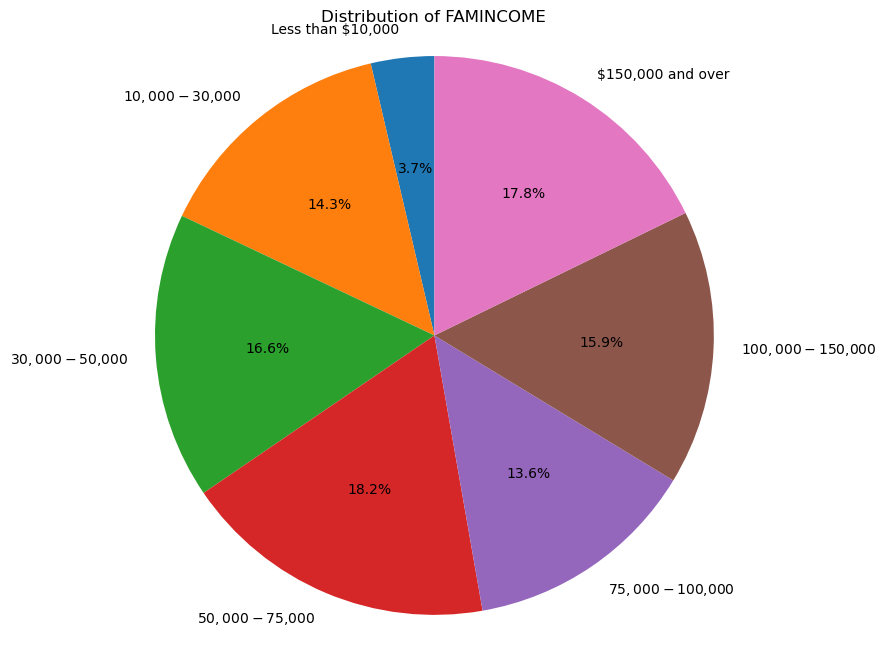

In [8]:
import matplotlib.pyplot as plt

income_order = ['Less than $10,000', '$10,000 - $30,000', '$30,000 - $50,000', '$50,000 - $75,000', '$75,000 - $100,000', '$100,000 - $150,000', '$150,000 and over']
income_counts = df['FAMINCOME_BINNED'].value_counts().loc[income_order]

plt.figure(figsize=(8, 8))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of FAMINCOME')
plt.axis('equal') 
plt.show()

# Age: GENERATION 

In [9]:
age_categories = df['AGE'].unique()

print("AGE Categories:")
for category in age_categories:
    print(category)

AGE Categories:
30
64
60
73
74
63
58
62
39
45
34
85
61
70
42
38
69
80
71
68
53
78
47
20
75
46
49
77
76
33
15
55
35
67
57
56
48
44
54
72
40
36
26
66
25
37
50
23
32
29
41
52
65
51
43
24
17
31
28
18
27
59
79
19
21
22
16


In [10]:
# bins based on ages: https://www.pewresearch.org/short-reads/2019/01/17/where-millennials-end-and-generation-z-begins/ft_19-01-17_generations_2019/
bin_edges = [6, 22, 38, 54, 73, 91]

bin_labels = ['Generation Z (7-22)', 'Millennials (23-38)', 'Generation X (39-54)', 'Boomers (55-73)', 'Silent (74-91)']

df['GENERATION'] = pd.cut(df['AGE'], bins=bin_edges, labels=bin_labels, right=False)

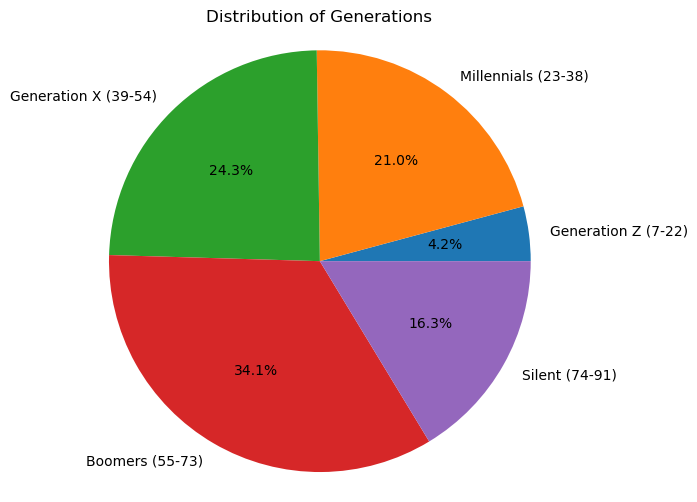

In [11]:
gen_order = ['Generation Z (7-22)', 'Millennials (23-38)', 'Generation X (39-54)', 'Boomers (55-73)', 'Silent (74-91)']
generation_counts = df['GENERATION'].value_counts().loc[gen_order]

plt.figure(figsize=(6,6))
plt.pie(generation_counts, labels=generation_counts.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Generations')
plt.axis('equal') 
plt.show()

# RACE: RACE_COMBINED

In [12]:
race_categories = df['RACE'].unique()

print("RACE Categories:")
for category in race_categories:
    print(category)

RACE Categories:
White only
Asian only
Black only
White-American Indian
American Indian, Alaskan Native
White-Black
Hawaiian Pacific Islander only
White-Black-American Indian
White-Asian
Black-American Indian
White-Hawaiian
Black-Asian
White-Black-Asian
Black-Hawaiian


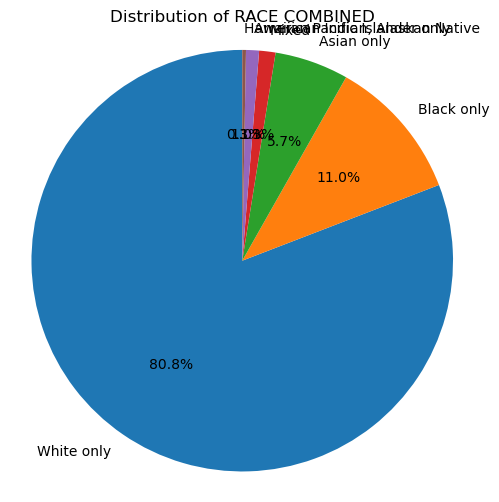

In [13]:
keep = ['White only', 'Asian only', 'Black only', 'American Indian, Alaskan Native', 'Hawaiian Pacific Islander only']

df['RACE_COMBINED'] = df['RACE'].apply(lambda x: x if x in keep else 'Mixed')

race_counts = df['RACE_COMBINED'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of RACE COMBINED')
plt.axis('equal') 
plt.show()

# GENHEALTH: HEALTH

In [18]:
health_categories = df['GENHEALTH'].unique()

print("GENHEALTH Categories:")
for category in health_categories:
    print(category)

GENHEALTH Categories:
Good
Very good
Excellent
Fair
Poor
NIU (Not in universe)
Refused
Don't know


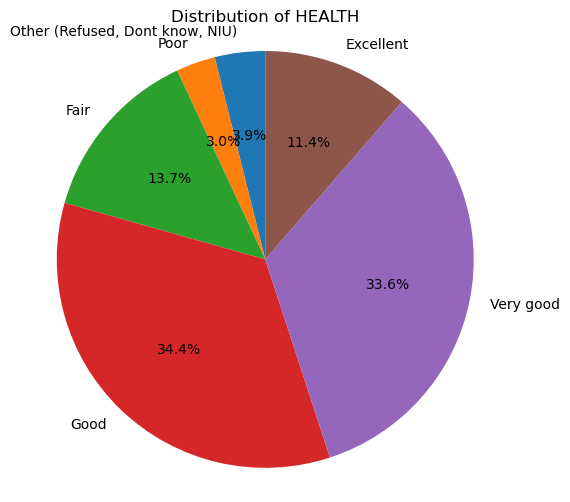

In [26]:
health_keep = ['Poor','Fair','Good','Very good','Excellent']

df['HEALTH'] = df['GENHEALTH'].apply(lambda x: x if x in health_keep else 'Other (Refused, Dont know, NIU)')

health_order = ['Other (Refused, Dont know, NIU)','Poor','Fair','Good','Very good','Excellent']
health_counts = df['HEALTH'].value_counts().loc[health_order]

plt.figure(figsize=(6,6))
plt.pie(health_counts, labels=health_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of HEALTH')
plt.axis('equal') 
plt.show()

# HEIGHT: HEIGHT_BINNED

In [29]:
df['HEIGHT'] = pd.to_numeric(df['HEIGHT'], errors='coerce')
height_categories = df['HEIGHT'].unique()

print("HEIGHT Categories:")
for category in height_categories:
    print(category)

HEIGHT Categories:
68.0
70.0
73.0
67.0
66.0
71.0
69.0
72.0
64.0
58.0
63.0
62.0
60.0
65.0
59.0
76.0
nan
75.0
56.0
61.0
74.0
77.0
57.0


In [30]:
bin_edges = [0, 60, 66, 72, 78, 84, 90]

# height in feet
bin_labels = ['0-5 feet', '5-5.5 feet', '5.5-6 feet', '6-6.5 feet', '6.5-7 feet', '7-7.5 feet']

df['HEIGHT_BINNED'] = pd.cut(df['HEIGHT'], bins=bin_edges, labels=bin_labels, right=False)

# Display the unique height categories
height_categories = df['HEIGHT_BINNED'].unique()
print(height_categories)

['5.5-6 feet', '6-6.5 feet', '5-5.5 feet', '0-5 feet', NaN]
Categories (6, object): ['0-5 feet' < '5-5.5 feet' < '5.5-6 feet' < '6-6.5 feet' < '6.5-7 feet' < '7-7.5 feet']


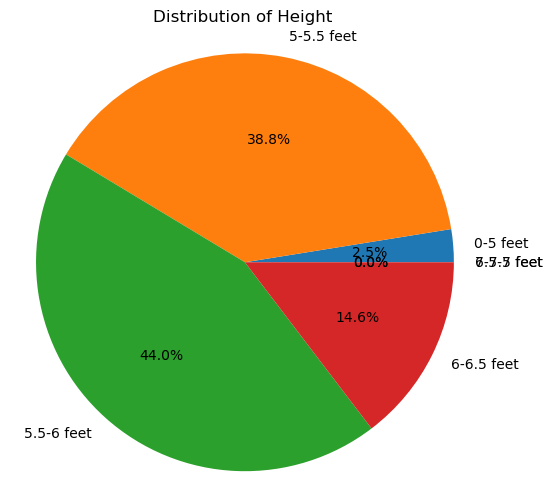

In [31]:
height_order = ['0-5 feet', '5-5.5 feet', '5.5-6 feet', '6-6.5 feet', '6.5-7 feet', '7-7.5 feet']
height_counts = df['HEIGHT_BINNED'].value_counts().loc[height_order]

plt.figure(figsize=(6,6))
plt.pie(height_counts, labels=height_counts.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Height')
plt.axis('equal') 
plt.show()

# WEIGHT: WEIGHT_BINNED

In [32]:
df['WEIGHT'] = pd.to_numeric(df['WEIGHT'], errors='coerce')


weight_categories = df['WEIGHT'].unique()

print("WEIGHT Categories:")
for category in weight_categories:
    print(category)

WEIGHT Categories:
245
148
165
275
214
127
190
225
180
171
150
210
155
230
143
120
9996
218
193
175
212
153
160
125
121
235
9997
280
9999
170
325
140
168
98
172
130
305
260
197
145
128
220
200
226
238
138
310
300
132
185
111
195
173
330
110
240
142
340
205
162
163
115
105
154
174
219
147
290
146
198
164
157
202
126
100
239
135
194
196
222
149
209
156
178
183
9994
268
123
250
112
249
285
176
106
191
139
182
265
189
216
129
144
215
204
179
124
186
117
255
166
167
270
118
192
188
208
295
161
181
187
136
184
122
234
320
203
206
108
119
99
114
211
152
116
263
134
131
158
207
288
201
247
251
159
107
113
137
177
104
199
133
213
223
169
315
258
228
151
236
271
233
101
232
109
291
217
248
229
221
242
243
262
231
296
276
224
237
333
246
269
227
254
252
256
103
244
324
287
264
272
299
282
312
335
308
266
141
257
278
253
273
297
286
292
277
304
294
241
259
326
267
319
318


In [33]:
bin_edges = [0, 100, 120, 140, 160, 180, 200, 300, float('inf')]

bin_labels = ['<100', '100-120', '120-140', '140-160', '160-180', '180-200', '200-300', '>300']

df['WEIGHT_BINNED'] = pd.cut(df['WEIGHT'], bins=bin_edges, labels=bin_labels, right=False)

weight_categories = df['WEIGHT_BINNED'].unique()
print(weight_categories)

['200-300', '140-160', '160-180', '120-140', '180-200', '>300', '<100', '100-120']
Categories (8, object): ['<100' < '100-120' < '120-140' < '140-160' < '160-180' < '180-200' < '200-300' < '>300']


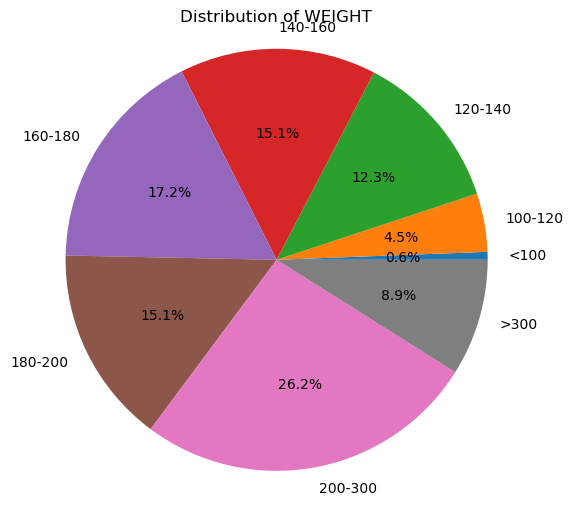

In [34]:
weight_order = ['<100', '100-120', '120-140', '140-160', '160-180', '180-200', '200-300', '>300']
weight_counts = df['WEIGHT_BINNED'].value_counts().loc[weight_order]

plt.figure(figsize=(6,6))
plt.pie(weight_counts, labels=weight_counts.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of WEIGHT')
plt.axis('equal') 
plt.show()

# EDUC: EDUC_BINNED

In [35]:
df['EDUC'] = df['EDUC'].astype(str)

educ_categories = df['EDUC'].unique()

# Display the unique categories
print("EDUC Categories:")
for category in educ_categories:
    print(category)

EDUC Categories:
High school graduate - diploma
Associate degree - occupational vocational
Bachelor's degree (BA, AB, BS, etc.)
Associate degree - academic program
Master's degree (MA, MS, MEng, MEd, MSW, etc.)
Some college but no degree
Doctoral degree (PhD, EdD, etc.)
High school graduate - GED
7th or 8th grade
9th grade
11th grade
10th grade
1st, 2nd, 3rd, or 4th grade
12th grade - no diploma
5th or 6th grade
Professional school degree (MD, DDS, DVM, etc.)
Less than 1st grade


In [36]:
education_mapping = {
    "Less than 1st grade": "Middle School or Less",
    "1st, 2nd, 3rd, or 4th grade": "Middle School or Less",
    "5th or 6th grade": "Middle School or Less",
    "7th or 8th grade": "Middle School or Less",
    "9th grade": "Some High School",
    "10th grade": "Some High School",
    "11th grade": "Some High School",
    "12th grade - no diploma": "Some High School",
    "High school graduate - diploma": "Graduated High School",
    "High school graduate - GED": "Graduated High School",
    "Some college but no degree": "Some College",
    "Associate degree - occupational vocational": "Associate Degree",
    "Associate degree - academic program": "Associate Degree",
    "Bachelor's degree (BA, AB, BS, etc.)": "Bachelor's Degree",
    "Master's degree (MA, MS, MEng, MEd, MSW, etc.)": "Master's or Doctoral Degree",
    "Doctoral degree (PhD, EdD, etc.)": "Master's or Doctoral Degree",
    "Professional school degree (MD, DDS, DVM, etc.)": "Master's or Doctoral Degree"
}

df['EDUC_BINNED'] = df['EDUC'].map(education_mapping)

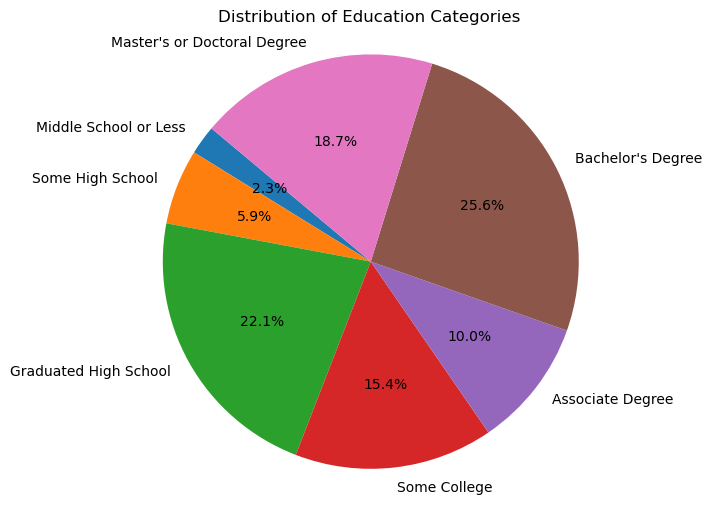

In [37]:
educ_order = ["Middle School or Less","Some High School", "Graduated High School", "Some College","Associate Degree", "Bachelor's Degree","Master's or Doctoral Degree"]


education_counts = df['EDUC_BINNED'].value_counts().loc[educ_order]


plt.figure(figsize=(6, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Education Categories')
plt.axis('equal')
plt.show()


In [38]:
df.head()

,TUCASEID,YEAR,CASEID,SERIAL,REGION,STATEFIP,FAMINCOME,HOUSETYPE,PERNUM,LINENO,...,Traveling,Volunteering,Working,FAMINCOME_BINNED,GENERATION,RACE_COMBINED,HEALTH,HEIGHT_BINNED,WEIGHT_BINNED,EDUC_BINNED
0,NaN,2022,20220101220500,2,Northeast,Massachusetts,67500,"House, apartment, flat",1,1,...,0,0,0,"$50,000 - $75,000",Millennials (23-38),White only,Good,5.5-6 feet,200-300,Graduated High School
1,NaN,2022,20220101220504,3,Midwest,Michigan,87500,"House, apartment, flat",1,1,...,0,0,185,"$75,000 - $100,000",Boomers (55-73),White only,Very good,5.5-6 feet,140-160,Associate Degree
2,NaN,2022,20220101220507,4,West,California,67500,"House, apartment, flat",1,1,...,45,0,50,"$50,000 - $75,000",Boomers (55-73),White only,Excellent,5.5-6 feet,160-180,Bachelor's Degree
3,NaN,2022,20220101220552,5,Midwest,Wisconsin,55000,"House, apartment, flat",1,1,...,0,0,0,"$50,000 - $75,000",Silent (74-91),White only,Very good,6-6.5 feet,200-300,Associate Degree
4,NaN,2022,20220101220574,6,Midwest,Ohio,67500,"House, apartment, flat",1,1,...,0,0,0,"$50,000 - $75,000",Silent (74-91),White only,Excellent,5.5-6 feet,200-300,Bachelor's Degree
